In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

username = 'postgres'
password = 'password'
database = 'employee_db'
host= 'localhost:5432'

engine = create_engine (f'postgresql://{username}:{password}@{host}/{database}')
connection = engine.connect()

In [11]:
#Uploaded departments table from employee_db
departments = pd.read_sql("select * from departments", connection)
departments.head()


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [12]:
dept_emp = pd.read_sql("select * from dept_emp", connection)
dept_emp.head()


,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [13]:
dept_manager = pd.read_sql("select * from dept_manager", connection)
dept_manager.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


In [14]:
employees = pd.read_sql("select * from employees", connection)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [29]:
salaries = pd.read_sql("select emp_no, salary from salaries", connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [32]:
titles = pd.read_sql("select emp_no, title from titles", connection)
titles.head()

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer


In [43]:
#Join dataframes and rename column 
salary_tittle_df= pd.merge(titles, salaries, how='inner', on='emp_no')
salary_tittle_df=salary_tittle_df.rename(columns={"title":"Title_Name"})
salary_tittle_df.head()

,emp_no,Title_Name,salary
0,10001,Senior Engineer,60117
1,10002,Staff,65828
2,10003,Senior Engineer,40006
3,10004,Engineer,40054
4,10004,Senior Engineer,40054


In [95]:
#Average salary by tittle 
avg_salary = salary_tittle_df.groupby('Title_Name').mean().round(2)
avg_salary = avg_salary.drop(columns=['emp_no']).rename(columns={'salary':'Avg_Salary'})
pd.options.display.float_format = '${:,}'.format
avg_salary

,Avg_Salary
Title_Name,
Assistant Engineer,"$48,493.2"
Engineer,"$48,539.78"
Manager,"$51,531.04"
Senior Engineer,"$48,506.75"
Senior Staff,"$58,503.29"
Staff,"$58,465.27"
Technique Leader,"$48,580.51"


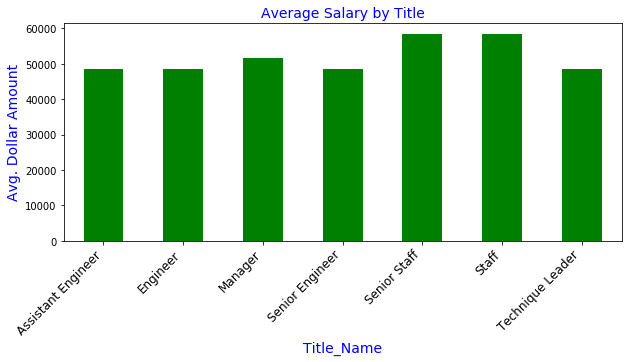

<Figure size 432x288 with 0 Axes>

In [97]:
# Chart our data, give it a title, and label the axes
avg_salary_chart = avg_salary.plot(kind="bar", colors='g', legend=False, figsize=(10,4))
avg_salary_chart.set_xlabel("Title_Name", color='blue', fontsize =(14))
avg_salary_chart.set_ylabel("Avg. Dollar Amount", color='blue', fontsize =(14))
avg_salary_chart.set_title("Average Salary by Title", color='blue', fontsize =(14))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')

plt.show()
plt.tight_layout()

### Technical Report 
1. Created database digram by typing the schema in  QuickDBD 
2. Created employee_db in PgAdmin
3. Created queries and saved them in my local drive by using Visual Stiudio Code
3. Insatalled sqlalchemy:
    * Used the database path to create a sqlite engine
    * Used the engine to select data from database and created dataframes in Jupyter Notebook 
